In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [2]:
# Read dataset file
df = pd.read_csv('STB.csv')
df = df[['Price']]
df = df.dropna()
df

,Price
0,11750
1,12550
2,12900
3,13300
4,13000
...,...
1237,27000
1238,27400
1239,27000
1240,27200


In [3]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# Normalize the data
mean = train_data.mean()
meant = test_data.mean()
meanv = val_data.mean()
std = train_data.std()
stdt = test_data.std()
stdv = val_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - meant) / stdt
val_data = (val_data - meanv) / stdv

In [5]:
# Prepare the data for CNN
window_size = 10

def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data.values, window_size)
X_test, y_test = create_sequences(test_data.values, window_size)
X_val, y_val = create_sequences(val_data.values, window_size)


In [6]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
27/27 [==============================] - 2s 15ms/step - loss: 0.1188 - val_loss: 0.1684
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0154 - val_loss: 0.1453
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.1237
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.1133
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.1116
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0102 - val_loss: 0.1014
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0096 - val_loss: 0.1047
Epoch 8/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.0945
Epoch 9/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0941
Epoch 10/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0091 - val_loss: 0.0946
Epoch 11

27/27 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0751
Epoch 84/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0747
Epoch 85/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0706
Epoch 86/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0713
Epoch 87/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0703
Epoch 88/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0718
Epoch 89/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0727
Epoch 90/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0690
Epoch 91/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0723
Epoch 92/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0677
Epoch 93/100


In [8]:
# Make predictions
y_pred = model.predict(X_test)
# Inverse transform the predictions
y_pred = y_pred * pd.Series(stdt).values[0] + pd.Series(meant).values[0]

8/8 [==============================] - 0s 2ms/step


In [9]:
# Make predictions
y_vpred = model.predict(X_val)
# Inverse transform the predictions
y_vpred = y_vpred * pd.Series(stdv).values[0] + pd.Series(meanv).values[0]

4/4 [==============================] - 0s 3ms/step


In [10]:
df

,Price
0,11750
1,12550
2,12900
3,13300
4,13000
...,...
1237,27000
1238,27400
1239,27000
1240,27200


In [11]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# re make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
# re make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_vpred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_vpred) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_vpred - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 3230.2284299790613
Testing RMSE: 7943.879614785134
Validation MAPE: 10.74341047994584
Testing MAPE: 26.729385506473946
Validation MAE: 2338.111897146739
Testing MAE: 6452.862396215417


In [12]:
y_val

array([15100, 16150, 17200, 17100, 16700, 16900, 17500, 18200, 18900,
       19700, 19750, 20000, 19500, 20850, 22300, 20750, 20300, 21700,
       22400, 21300, 22550, 23250, 23250, 22800, 22400, 22450, 23550,
       23400, 23500, 21900, 22500, 22900, 22350, 22500, 23500, 23300,
       24200, 24300, 24650, 24950, 24700, 24950, 25300, 25500, 26550,
       26800, 26800, 26650, 25850, 27100, 25650, 26150, 26050, 25700,
       25750, 25000, 24450, 23650, 24500, 24400, 23350, 23900, 24400,
       25700, 25350, 24700, 25000, 24300, 23600, 23750, 25400, 25600,
       25000, 24900, 25000, 25350, 26500, 26000, 25000, 24400, 25350,
       24600, 25050, 24200, 24600, 24800, 25000, 25050, 25500, 25400,
       25350, 26000, 26200, 26750, 26900, 26250, 25650, 26000, 25950,
       25950, 26100, 26450, 25700, 25900, 25900, 25500, 25700, 25600,
       25550, 25050, 25400, 25150, 25300, 25150, 24950, 25650, 25750,
       26350, 26400, 26800, 27000, 27400, 27000, 27200, 27850],
      dtype=int64)

In [13]:
y_vpred

array([[19321.625],
       [19849.172],
       [19890.906],
       [19867.133],
       [20336.367],
       [22014.99 ],
       [21942.752],
       [20539.477],
       [21763.426],
       [21969.871],
       [22118.686],
       [21809.299],
       [22965.52 ],
       [23015.998],
       [23015.422],
       [21949.941],
       [21884.48 ],
       [23364.03 ],
       [23470.402],
       [23124.855],
       [22309.16 ],
       [22124.072],
       [22929.875],
       [22606.758],
       [22124.828],
       [23359.53 ],
       [23436.703],
       [23783.197],
       [24515.4  ],
       [24281.693],
       [24857.082],
       [24518.979],
       [24530.068],
       [24965.006],
       [25316.57 ],
       [26429.531],
       [26847.447],
       [26819.832],
       [26722.994],
       [26338.662],
       [26856.656],
       [26620.164],
       [26086.96 ],
       [26482.26 ],
       [25754.914],
       [25502.074],
       [25262.963],
       [24761.357],
       [24520.342],
       [24623.88 ],


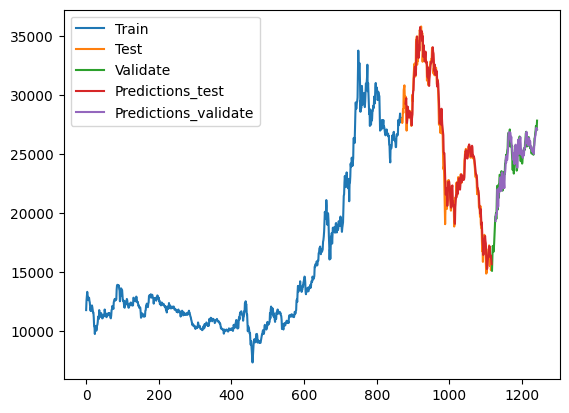

In [14]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index[-len(y_pred):], y_pred)
plt.plot(val_data.index[-len(y_vpred):], y_vpred)
plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()

In [15]:
y_val

array([15100, 16150, 17200, 17100, 16700, 16900, 17500, 18200, 18900,
       19700, 19750, 20000, 19500, 20850, 22300, 20750, 20300, 21700,
       22400, 21300, 22550, 23250, 23250, 22800, 22400, 22450, 23550,
       23400, 23500, 21900, 22500, 22900, 22350, 22500, 23500, 23300,
       24200, 24300, 24650, 24950, 24700, 24950, 25300, 25500, 26550,
       26800, 26800, 26650, 25850, 27100, 25650, 26150, 26050, 25700,
       25750, 25000, 24450, 23650, 24500, 24400, 23350, 23900, 24400,
       25700, 25350, 24700, 25000, 24300, 23600, 23750, 25400, 25600,
       25000, 24900, 25000, 25350, 26500, 26000, 25000, 24400, 25350,
       24600, 25050, 24200, 24600, 24800, 25000, 25050, 25500, 25400,
       25350, 26000, 26200, 26750, 26900, 26250, 25650, 26000, 25950,
       25950, 26100, 26450, 25700, 25900, 25900, 25500, 25700, 25600,
       25550, 25050, 25400, 25150, 25300, 25150, 24950, 25650, 25750,
       26350, 26400, 26800, 27000, 27400, 27000, 27200, 27850],
      dtype=int64)

In [16]:
y_vpred

array([[19321.625],
       [19849.172],
       [19890.906],
       [19867.133],
       [20336.367],
       [22014.99 ],
       [21942.752],
       [20539.477],
       [21763.426],
       [21969.871],
       [22118.686],
       [21809.299],
       [22965.52 ],
       [23015.998],
       [23015.422],
       [21949.941],
       [21884.48 ],
       [23364.03 ],
       [23470.402],
       [23124.855],
       [22309.16 ],
       [22124.072],
       [22929.875],
       [22606.758],
       [22124.828],
       [23359.53 ],
       [23436.703],
       [23783.197],
       [24515.4  ],
       [24281.693],
       [24857.082],
       [24518.979],
       [24530.068],
       [24965.006],
       [25316.57 ],
       [26429.531],
       [26847.447],
       [26819.832],
       [26722.994],
       [26338.662],
       [26856.656],
       [26620.164],
       [26086.96 ],
       [26482.26 ],
       [25754.914],
       [25502.074],
       [25262.963],
       [24761.357],
       [24520.342],
       [24623.88 ],
